In [1]:
# Import Dependencies
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
# Read the csv file into a pandas DataFrame
hr_employee = pd.read_csv("../Resources/HREmployeeAttrition.csv")
hr_employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Select our independent X variables, and our dependent y variable. 
X = hr_employee.drop(columns = ['Attrition'])
y = hr_employee['Attrition']

In [4]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print(X.columns)
print(X.dtypes.unique())
y.value_counts()

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
[dtype('int64')]


0    1233
1     237
Name: Attrition, dtype: int64

### Imbalanced

In [5]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [6]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print(X.columns)
print(X.dtypes.unique())
y.value_counts()

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
[dtype('int64')]


0    1233
1     237
Name: Attrition, dtype: int64

In [7]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [8]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [9]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

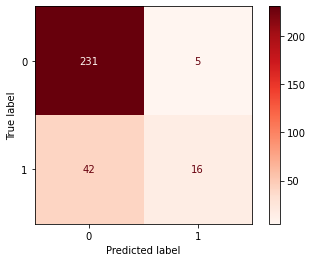

In [10]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

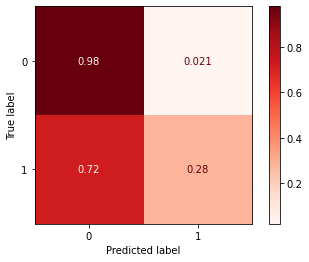

In [11]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [12]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Not Attrition", "Attrition"]))

               precision    recall  f1-score   support

Not Attrition       0.85      0.98      0.91       236
    Attrition       0.76      0.28      0.41        58

     accuracy                           0.84       294
    macro avg       0.80      0.63      0.66       294
 weighted avg       0.83      0.84      0.81       294



### Balanced

In [13]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [14]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print(X.columns)
print(X.dtypes.unique())
y.value_counts()

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
[dtype('int64')]


0    1233
1     237
Name: Attrition, dtype: int64

In [15]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [16]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

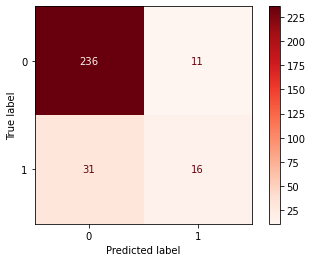

In [18]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

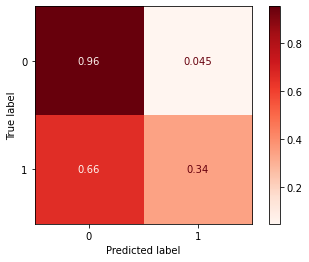

In [19]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [20]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Not Attrition", "Attrition"]))

               precision    recall  f1-score   support

Not Attrition       0.88      0.96      0.92       247
    Attrition       0.59      0.34      0.43        47

     accuracy                           0.86       294
    macro avg       0.74      0.65      0.68       294
 weighted avg       0.84      0.86      0.84       294

